In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
#data_csv = pd.read_csv('', low_memory=False, header=None, nrows=20000)
data_csv = pd.read_csv('/home/rajeev/Documents/Project/Logs_A.csv', low_memory=False)

In [3]:
# assign columns to data set
data_csv.columns = ['Time','Destination','Rule','Interface_Direction','Policy_Rule_UID','Type','Interface','Policy_Date',
                    'Service_ID','Action','ID','Interface_Name','Layer_Name','Source_Port','Product_Family','Blade',
                    'Sequence_Number','Source_Zone','Source','Access_Rule_Name','Policy_Name','id_generated_by_indexer',
                    'Destination_Zone','Database_Tag','Log_Server_Origin','Service','Origin','Marker','Destination_Port',
                    'Domain','Protocol','logid','first','Policy_Management','Xlate_(NAT)_Source_IP','NAT_Additional_Rule_Number',
                    'nat_rule_uid','Xlate_(NAT)_Source_Port','NAT_Rule_Number','Xlate_(NAT)_Destination_Port','dst_domain_name',
                    'dst_uo_name','dst_uo_icon','tcp_flags','tcp_packet_out_of_state','Resource','icmp_type','icmp','icmp_code',
                    'Direction_of_Connection','log_delay','action_reason','src_uo_icon','src_uo_name','lastupdatetime',
                    'Message_Information','sys_message','Performance_Impact','sub_policy_uid','Protection_ID','Confidence_Level',
                    'Attack_Information','Industry_Reference','Attack_Name','Severity','Threat_Profile','Protection_Type','Suppressed_Logs',
                    'Sub_Policy_Name','Protection_Name','Total_Logs','dce-rpc_interface_uuid-2','dce-rpc_interface_uuid-1',
                    'dce-rpc_interface_uuid-3','dce-rpc_interface_uuid','Xlate_(NAT)_Destination_IP','rpc_prog','Reason','precise_error',
                    'Proxied_Source_IP','source_object','Description','fw_message','source','Received_Bytes','packet_capture_time','Method',
                    'Threat_Prevention_Policy_Date','Incident_ID','Vendor_List','HTTP_Host','Sent_Bytes','Scope','Threat_Prevention_Rule_ID',
                    'Threat_Prevention_Policy','Log_ID','Packet_Capture_Name','Session_ID','Malware_Action','Packet_Capture','Scheme',
                    'validation_log','Vpn_Feature_Name','dn','instruction','Email_Session_ID','Information','Email_Control','update_service',
                    'version','comment','Status','Peer_Gateway','encryption_failure','reject_category','encryption_fail_reason','Tags',
                    'description_url','reject_id_kid','Execution','ser_agent_kid','User_Agent','Malware_Family','Credential_Access',
                    'Collection','Discovery','Initial_Access','inspection_settings_log','streaming_engine','src_domain_name','Methods',
                    'Session_ID','community','User','ike','cookiei','cookier','srckeyid','msgid','dstkeyid','ike_ids','failure_impact',
                    'more_sources','User_Domain','Device_ID','Duration','Event_Type','Mobile_Access_Category','Login_TimeStamp',
                    'Source_OS','control_log_type','failed_login_factor_num','Host_Name','Domain_Name','os_build','Tunnel_Protocol',
                    'User_Group','Login_Option','session_timeout','Office_Mode_IP','Device','Machine_Name','MAC_Address','Client_Version',
                    'Client_Name','Host_IP','Client_Build','OS_Version','OS_Bits','OS_Name','os_edition','Auth_Encryption_Methods','connection_uid',
                    'start_time']


In [16]:

print(data_csv.shape)
data_csv.head()

(251554, 174)


Time     Destination   Rule Interface_Direction  \
0  July 18, 2023 1:18:41 PM  20.202.255.225  5.294             inbound   
1  July 18, 2023 1:18:41 PM    192.168.5.37  5.680             inbound   
2  July 18, 2023 1:18:41 PM  192.168.224.36  5.680             inbound   
3  July 18, 2023 1:18:41 PM    52.166.80.90  5.294             inbound   
4  July 18, 2023 1:18:41 PM   12.10.193.196  5.151             inbound   

                        Policy_Rule_UID Type Interface           Policy_Date  \
0  b74e79b2-cc95-4006-9115-258b6b2cd986  RST      eth1  2023-04-28T16:57:15Z   
1  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
2  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
3  b74e79b2-cc95-4006-9115-258b6b2cd986  FIN      eth1  2023-04-28T16:57:15Z   
4  78799b30-d542-4d4e-a391-baa891bf1091  RST      eth1  2023-04-28T16:29:24Z   

       Service_ID Action  ... Client_Name Host_IP Client_Build  OS_Version  \
0            http   Drop  ...         NaN     NaN          NaN         NaN   
1            snmp   Drop  ...         NaN     NaN          NaN         NaN   
2            snmp   Drop  ...         NaN     NaN          NaN         NaN   
3           https   Drop  ...         NaN     NaN          NaN         NaN   
4  tcp-high-ports   Drop  ...         NaN     NaN          NaN         NaN   

  OS_Bits OS_Name  os_edition Auth_Encryption_Methods connection_uid  \
0     NaN     NaN         NaN                     NaN            NaN   
1     NaN     NaN         NaN                     NaN            NaN   
2     NaN     NaN         NaN                     NaN            NaN   
3     NaN     NaN         NaN                     NaN            NaN   
4     NaN     NaN         NaN                     NaN            NaN   

  start_time  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 174 columns]

In [115]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Columns: 174 entries, Time to start_time
dtypes: bool(2), float64(77), int64(1), object(94)
memory usage: 330.6+ MB


In [116]:
data_csv.Action.value_counts()

Drop      193649
Accept     57905
Name: Action, dtype: int64

In [117]:
data_csv.isnull().sum()

Time                            0
Destination                     0
Rule                        10027
Interface_Direction             0
Policy_Rule_UID             10027
                            ...  
OS_Name                    251554
os_edition                 251554
Auth_Encryption_Methods    251554
connection_uid             251554
start_time                 251554
Length: 174, dtype: int64

In [17]:
count = data_csv.Action.value_counts()
count

Action
Drop      193649
Accept     57905
Name: count, dtype: int64

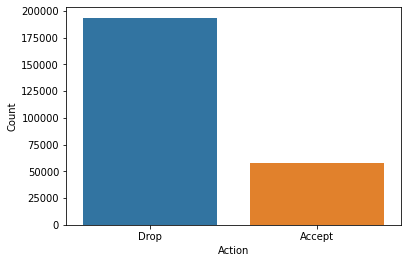

In [63]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Action')
plt.ylabel('Count');

In [64]:
#Feature Engineering

In [65]:
data_csv.tail()

Time      Destination   Rule Interface_Direction  \
251549  July 18, 2023 1:15:30 PM    192.168.244.5  5.480             inbound   
251550  July 18, 2023 1:15:30 PM    20.150.37.230  5.294             inbound   
251551  July 18, 2023 1:15:30 PM    (192.168.96.6  5.900             inbound   
251552  July 18, 2023 1:15:30 PM   52.182.143.210  5.128             inbound   
251553  July 18, 2023 1:15:30 PM  192.168.175.135  5.440             inbound   

                             Policy_Rule_UID        Type  Interface  \
251549  a6416ccd-b460-4599-b87a-c8af18a05dc2  Connection  bond0.320   
251550  b74e79b2-cc95-4006-9115-258b6b2cd986      Reject       eth1   
251551  2c2970b9-92c5-4506-b0d5-8dcd11c9a304  Connection  bond0.200   
251552  5506278c-3493-4d04-b153-546a06332e04  Connection       eth1   
251553  f65155bc-bc93-4e34-8faf-792b02e5f0a3  Connection       eth1   

                 Policy_Date  Service_ID  Action  ... Client_Name Host_IP  \
251549  2023-04-28T16:29:24Z  domain-udp  Accept  ...         NaN     NaN   
251550  2023-04-28T16:57:15Z       https    Drop  ...         NaN     NaN   
251551  2023-04-28T16:29:24Z        snmp  Accept  ...         NaN     NaN   
251552  2023-04-28T16:57:15Z       https  Accept  ...         NaN     NaN   
251553  2023-04-28T16:57:15Z    TCP_5985  Accept  ...         NaN     NaN   

       Client_Build  OS_Version OS_Bits OS_Name  os_edition  \
251549          NaN         NaN     NaN     NaN         NaN   
251550          NaN         NaN     NaN     NaN         NaN   
251551          NaN         NaN     NaN     NaN         NaN   
251552          NaN         NaN     NaN     NaN         NaN   
251553          NaN         NaN     NaN     NaN         NaN   

       Auth_Encryption_Methods connection_uid start_time  
251549                     NaN            NaN        NaN  
251550                     NaN            NaN        NaN  
251551                     NaN            NaN        NaN  
251552                     NaN            NaN        NaN  
251553                     NaN            NaN        NaN  

[5 rows x 174 columns]

In [66]:
data_csv.head()

Time     Destination   Rule Interface_Direction  \
0  July 18, 2023 1:18:41 PM  20.202.255.225  5.294             inbound   
1  July 18, 2023 1:18:41 PM    192.168.5.37  5.680             inbound   
2  July 18, 2023 1:18:41 PM  192.168.224.36  5.680             inbound   
3  July 18, 2023 1:18:41 PM    52.166.80.90  5.294             inbound   
4  July 18, 2023 1:18:41 PM   12.10.193.196  5.151             inbound   

                        Policy_Rule_UID Type Interface           Policy_Date  \
0  b74e79b2-cc95-4006-9115-258b6b2cd986  RST      eth1  2023-04-28T16:57:15Z   
1  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
2  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
3  b74e79b2-cc95-4006-9115-258b6b2cd986  FIN      eth1  2023-04-28T16:57:15Z   
4  78799b30-d542-4d4e-a391-baa891bf1091  RST      eth1  2023-04-28T16:29:24Z   

       Service_ID Action  ... Client_Name Host_IP Client_Build  OS_Version  \
0            http   Drop  ...         NaN     NaN          NaN         NaN   
1            snmp   Drop  ...         NaN     NaN          NaN         NaN   
2            snmp   Drop  ...         NaN     NaN          NaN         NaN   
3           https   Drop  ...         NaN     NaN          NaN         NaN   
4  tcp-high-ports   Drop  ...         NaN     NaN          NaN         NaN   

  OS_Bits OS_Name  os_edition Auth_Encryption_Methods connection_uid  \
0     NaN     NaN         NaN                     NaN            NaN   
1     NaN     NaN         NaN                     NaN            NaN   
2     NaN     NaN         NaN                     NaN            NaN   
3     NaN     NaN         NaN                     NaN            NaN   
4     NaN     NaN         NaN                     NaN            NaN   

  start_time  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 174 columns]

In [119]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Columns: 174 entries, Time to start_time
dtypes: bool(2), float64(77), int64(1), object(94)
memory usage: 330.6+ MB


In [120]:
data_csv["Action"].value_counts()

Drop      193649
Accept     57905
Name: Action, dtype: int64

In [4]:
lb_make = LabelEncoder()
data_csv["type_code"] = lb_make.fit_transform(data_csv["Action"])
data_csv["type_code"].value_counts()

type_code
1    193649
0     57905
Name: count, dtype: int64

In [140]:
data_csv.shape

(251554, 15)

In [141]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rule                      251554 non-null  float64
 1   Action                    251554 non-null  object 
 2   Source_Port               251554 non-null  float64
 3   Sequence_Number           251554 non-null  int64  
 4   Destination_Port          251554 non-null  float64
 5   Xlate_(NAT)_Source_Port   251554 non-null  float64
 6   icmp_type                 251554 non-null  object 
 7   icmp_code                 251554 non-null  object 
 8   dce-rpc_interface_uuid-2  251554 non-null  float64
 9   dce-rpc_interface_uuid-1  251554 non-null  float64
 10  dce-rpc_interface_uuid-3  251554 non-null  object 
 11  dce-rpc_interface_uuid    251554 non-null  float64
 12  rpc_prog                  251554 non-null  float64
 13  Log_ID                    251554 non-null  f

In [142]:
data_csv['Action'].value_counts()



Drop      193649
Accept     57905
Name: Action, dtype: int64

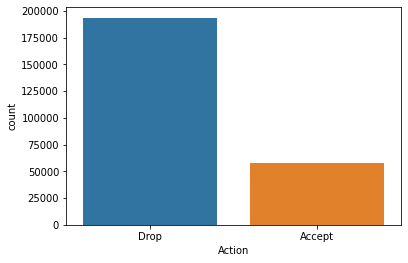

In [125]:
sns.countplot(x='Action', data=data_csv);

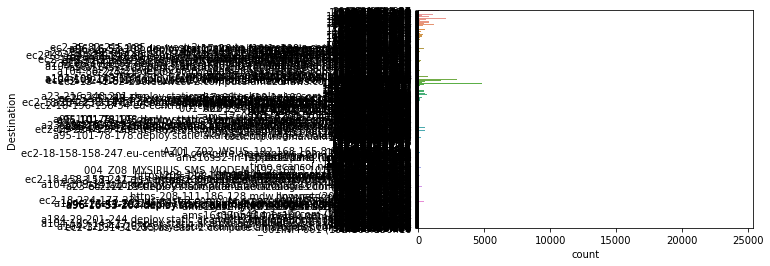

In [318]:
sns.countplot(y='Destination', data=data_csv);

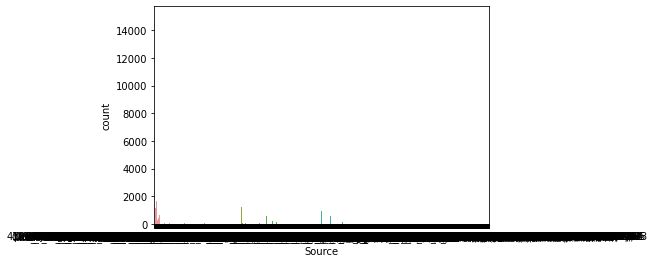

In [319]:
sns.countplot(x='Source', data=data_csv);

In [126]:
s_count = data_csv.Service_ID.value_counts()
s_count

https              141162
tcp-high-ports      26034
domain-udp          19796
http                19475
TCP_5985             7441
                    ...  
TCP_VMWARE_9087         1
TCP_FTPS_11021          1
TCP_8003                1
rip                     1
FW1_omi-sic             1
Name: Service_ID, Length: 185, dtype: int64

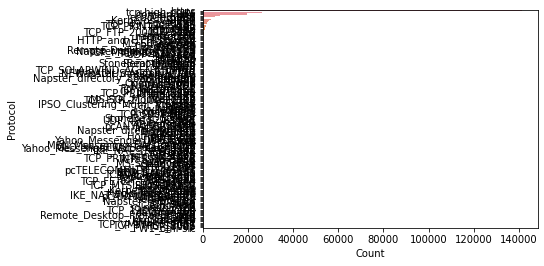

In [127]:
sns.barplot(y=s_count.index, x=s_count)
plt.xlabel('Count')
plt.ylabel('Protocol');


In [128]:
tcp_flag_count = data_csv.tcp_flags.value_counts()
tcp_flag_count

SYN-ACK         271
FIN-ACK         168
FIN-PUSH-ACK    103
PUSH-ACK         90
ACK              60
RST-ACK          41
RST              18
No Flags          2
Name: tcp_flags, dtype: int64

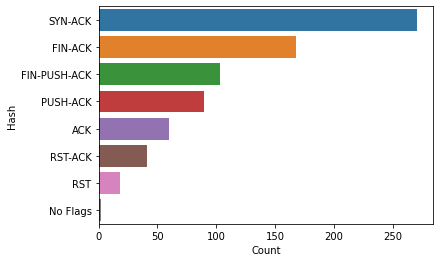

In [129]:
sns.barplot(y=tcp_flag_count.index, x=tcp_flag_count)
plt.xlabel('Count')
plt.ylabel('Hash');

In [130]:
connection_type = data_csv.Type.value_counts()
connection_type

Reject        186383
Connection     61558
FIN             2965
INT              267
Log              162
RST              122
CON               97
Name: Type, dtype: int64

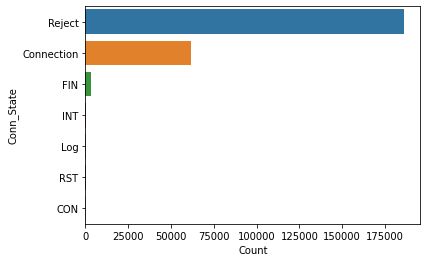

In [131]:
sns.barplot(y=connection_type.index, x=connection_type)
plt.xlabel('Count')
plt.ylabel('Conn_State');

<AxesSubplot:>

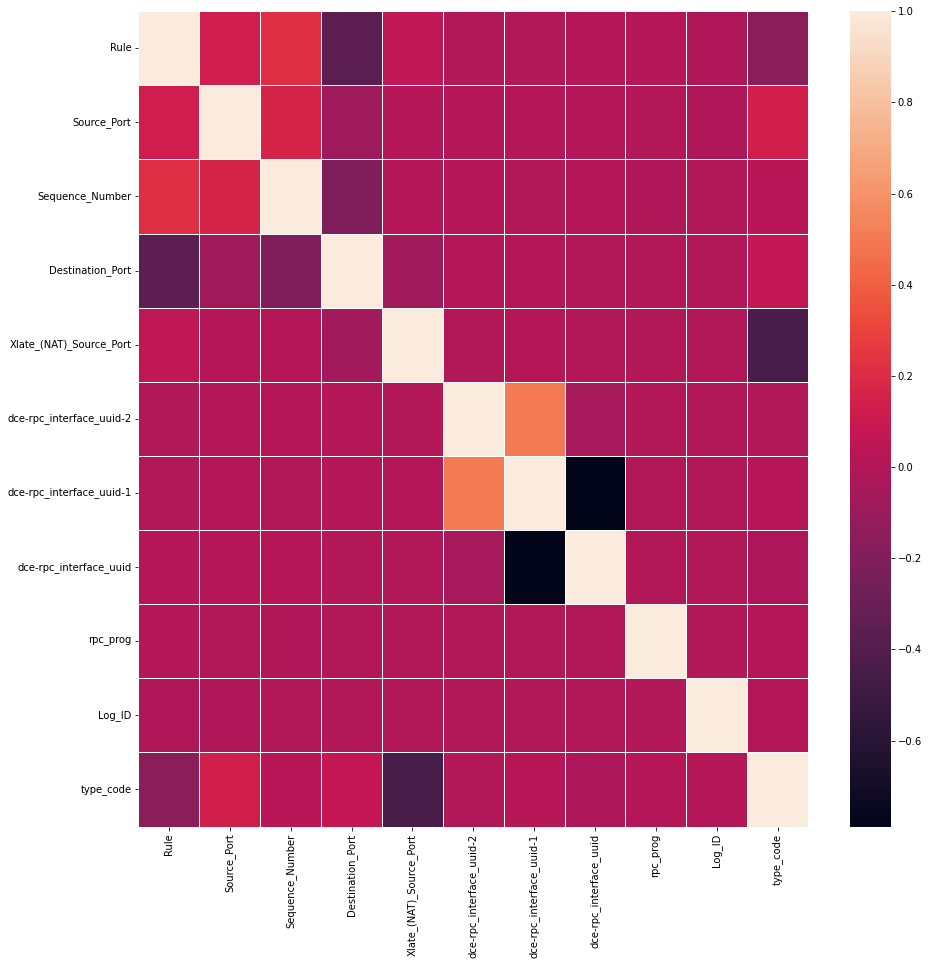

In [135]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_csv.corr(), linewidths=.5)

In [26]:
data_csv.describe()

Rule    Source_Port  Sequence_Number  Destination_Port  \
count  251554.000000  251554.000000    251554.000000     251554.000000   
mean        5.037408   53221.371328        14.847031       3530.227764   
std         1.121459   11861.906475        11.960839      10162.501374   
min         0.000000       0.000000         1.000000          0.000000   
25%         5.270000   50579.000000         4.000000        443.000000   
50%         5.294000   55491.000000        12.000000        443.000000   
75%         5.294000   59518.000000        23.000000        443.000000   
max         5.980000   65535.000000       107.000000      65535.000000   

       Xlate_(NAT)_Source_Port      icmp_type      icmp_code  \
count            251554.000000  251554.000000  251554.000000   
mean               2743.133168       0.171331       0.000052   
std               10077.419889       1.158119       0.025920   
min                   0.000000       0.000000       0.000000   
25%                   0.000000       0.000000       0.000000   
50%                   0.000000       0.000000       0.000000   
75%                   0.000000       0.000000       0.000000   
max               59997.000000       8.000000      13.000000   

       dce-rpc_interface_uuid-2  dce-rpc_interface_uuid-1  \
count              2.515540e+05              2.515540e+05   
mean               4.180053e+04             -1.630251e+05   
std                1.976238e+07              1.680391e+07   
min               -1.812774e+09             -1.988219e+09   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                0.000000e+00              0.000000e+00   
max                1.258689e+09              3.054202e+08   

       dce-rpc_interface_uuid-3  dce-rpc_interface_uuid       rpc_prog  \
count              2.515540e+05            2.515540e+05  251554.000000   
mean              -2.806329e+05            3.410454e+05       5.167876   
std                2.018840e+07            2.300898e+07     718.862292   
min               -1.667433e+09            0.000000e+00       0.000000   
25%                0.000000e+00            0.000000e+00       0.000000   
50%                0.000000e+00            0.000000e+00       0.000000   
75%                0.000000e+00            0.000000e+00       0.000000   
max                0.000000e+00            2.001296e+09  100000.000000   

              Log_ID      type_code  
count  251554.000000  251554.000000  
mean        1.609468       1.539165  
std       807.175186       0.841997  
min         0.000000       0.000000  
25%         0.000000       2.000000  
50%         0.000000       2.000000  
75%         0.000000       2.000000  
max    404840.000000       3.000000

In [244]:
data_csv.columns

Index(['Time', 'Destination', 'Rule', 'Interface_Direction', 'Policy_Rule_UID',
       'Type', 'Interface', 'Policy_Date', 'Service_ID', 'Action',
       ...
       'Host_IP', 'Client_Build', 'OS_Version', 'OS_Bits', 'OS_Name',
       'os_edition', 'Auth_Encryption_Methods', 'connection_uid', 'start_time',
       'type_code'],
      dtype='object', length=175)

In [136]:
data_csv.groupby('Action').max()

/tmp/ipykernel_6819/2615753808.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data_csv.groupby('Action').max()


Rule  Source_Port  Sequence_Number  Destination_Port  \
Action                                                         
Accept  5.98      65535.0              107           50111.0   
Drop    5.96      65534.0              105           65535.0   

        Xlate_(NAT)_Source_Port  dce-rpc_interface_uuid-2  \
Action                                                      
Accept                  59997.0              1.258689e+09   
Drop                    59921.0              1.258689e+09   

        dce-rpc_interface_uuid-1  dce-rpc_interface_uuid  rpc_prog    Log_ID  \
Action                                                                         
Accept               305420152.0            2.001296e+09       0.0       0.0   
Drop                 305420152.0            1.338171e+09  100000.0  404840.0   

        type_code  
Action             
Accept          0  
Drop            1

In [145]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rule                      251554 non-null  float64
 1   Action                    0 non-null       float64
 2   Source_Port               251554 non-null  float64
 3   Sequence_Number           251554 non-null  int64  
 4   Destination_Port          251554 non-null  float64
 5   Xlate_(NAT)_Source_Port   251554 non-null  float64
 6   icmp_type                 251553 non-null  float64
 7   icmp_code                 251553 non-null  float64
 8   dce-rpc_interface_uuid-2  251554 non-null  float64
 9   dce-rpc_interface_uuid-1  251554 non-null  float64
 10  dce-rpc_interface_uuid-3  251553 non-null  float64
 11  dce-rpc_interface_uuid    251554 non-null  float64
 12  rpc_prog                  251554 non-null  float64
 13  Log_ID                    251554 non-null  f

In [5]:
data_csv['Action'] = data_csv['Action'].apply(pd.to_numeric,  errors='coerce')
data_csv['icmp_type'] = data_csv['icmp_type'].apply(pd.to_numeric,  errors='coerce')
data_csv['icmp_code'] = data_csv['icmp_code'].apply(pd.to_numeric,  errors='coerce')
data_csv['dce-rpc_interface_uuid-3'] = data_csv['dce-rpc_interface_uuid-3'].apply(pd.to_numeric,  errors='coerce')

In [181]:
# looking at the correlations of the features.
corr = data_csv.corr()
corr.style.background_gradient(cmap='coolwarm')

<AxesSubplot:xlabel='Action', ylabel='Count'>

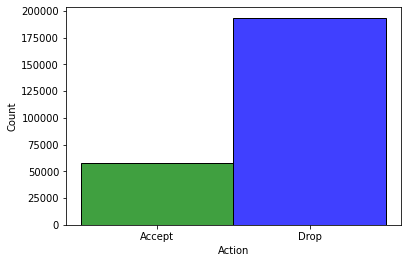

In [78]:
#Accept represents as 0
#Detect represents as 1
#Drop represents as 2

sns.histplot(data_csv.loc[data_csv['type_code'] == 0]['Action'], bins = 20, color='green')
sns.histplot(data_csv.loc[data_csv['type_code'] == 1]['Action'], bins = 20, color='blue')
sns.histplot(data_csv.loc[data_csv['type_code'] == 2]['Action'], bins = 20, color='red')
sns.histplot(data_csv.loc[data_csv['type_code'] == 3]['Action'], bins = 20, color='orange')


<AxesSubplot:>

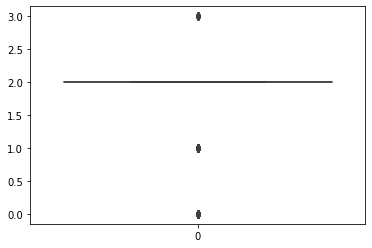

In [335]:
sns.boxplot(data_csv['type_code'])

In [134]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rule                      251554 non-null  float64
 1   Action                    251554 non-null  object 
 2   Source_Port               251554 non-null  float64
 3   Sequence_Number           251554 non-null  int64  
 4   Destination_Port          251554 non-null  float64
 5   Xlate_(NAT)_Source_Port   251554 non-null  float64
 6   icmp_type                 251554 non-null  object 
 7   icmp_code                 251554 non-null  object 
 8   dce-rpc_interface_uuid-2  251554 non-null  float64
 9   dce-rpc_interface_uuid-1  251554 non-null  float64
 10  dce-rpc_interface_uuid-3  251554 non-null  object 
 11  dce-rpc_interface_uuid    251554 non-null  float64
 12  rpc_prog                  251554 non-null  float64
 13  Log_ID                    251554 non-null  f

In [7]:
del data_csv ['Action']

In [6]:
# data preprocessing - in this, deleting un-necessary tables and null holding table
del data_csv ['Time']
del data_csv ['Destination']
del data_csv ['Interface_Direction']
del data_csv ['Type']
del data_csv ['Interface']
del data_csv ['Policy_Date']
del data_csv ['Service_ID']
del data_csv ['Layer_Name']
del data_csv ['Attack_Information']
del data_csv ['Attack_Name']
del data_csv ['Severity']
del data_csv ['Protection_Type']
del data_csv ['Protection_Name']
del data_csv ['source_object']
del data_csv ['Destination_Zone']
del data_csv ['Xlate_(NAT)_Source_IP']
del data_csv ['tcp_flags']
del data_csv ['icmp']
del data_csv ['src_uo_name']
del data_csv ['Message_Information']
del data_csv ['Protection_ID']
del data_csv ['Product_Family']
del data_csv ['Blade']
del data_csv ['Source_Zone']
del data_csv ['Source']
del data_csv ['Policy_Name']
del data_csv ['Service']
del data_csv ['Origin']
del data_csv ['Policy_Rule_UID']
del data_csv ['ID']
del data_csv ['Host_IP']
del data_csv ['MAC_Address']
del data_csv ['Client_Version']
del data_csv ['Client_Build']
del data_csv ['Office_Mode_IP']
del data_csv ['Device']
del data_csv ['Machine_Name']
del data_csv ['OS_Bits']
del data_csv ['OS_Name']
del data_csv ['os_edition']
del data_csv ['Auth_Encryption_Methods']
del data_csv ['connection_uid']
del data_csv ['start_time']
del data_csv ['Source_OS']
del data_csv ['control_log_type']
del data_csv ['failed_login_factor_num']
del data_csv ['Host_Name']
del data_csv ['Domain_Name']
del data_csv ['os_build']
del data_csv ['Tunnel_Protocol']
del data_csv ['User_Group']
del data_csv ['Login_Option']
del data_csv ['OS_Version']
del data_csv ['dstkeyid']
del data_csv ['ike_ids']
del data_csv ['failure_impact']
del data_csv ['more_sources']
del data_csv ['User_Domain']
del data_csv ['Device_ID']
del data_csv ['Duration']
del data_csv ['Event_Type']
del data_csv ['Mobile_Access_Category']
del data_csv ['msgid']
del data_csv ['Execution']
del data_csv ['ser_agent_kid']
del data_csv ['User_Agent']
del data_csv ['Malware_Family']
del data_csv ['Credential_Access']
del data_csv ['Collection']
del data_csv ['Discovery']
del data_csv ['Initial_Access']
del data_csv ['inspection_settings_log']
del data_csv ['streaming_engine']
del data_csv ['version']
del data_csv ['comment']
del data_csv ['Status']
del data_csv ['Peer_Gateway']
del data_csv ['encryption_failure']
del data_csv ['reject_category']
del data_csv ['encryption_fail_reason']
del data_csv ['Tags']
del data_csv ['description_url']
del data_csv ['reject_id_kid']
del data_csv ['Packet_Capture']
del data_csv ['Scheme']
del data_csv ['validation_log']
del data_csv ['Vpn_Feature_Name']
del data_csv ['dn']
del data_csv ['instruction']
del data_csv ['Email_Session_ID']
del data_csv ['Information']
del data_csv ['Email_Control']
del data_csv ['update_service']
del data_csv ['Vendor_List']
del data_csv ['Session_ID']
del data_csv ['Description']
del data_csv ['fw_message']
del data_csv ['source']
del data_csv ['Received_Bytes']
del data_csv ['packet_capture_time']
del data_csv ['Threat_Profile']
del data_csv ['Suppressed_Logs']
del data_csv ['Sub_Policy_Name']
del data_csv ['Direction_of_Connection']
del data_csv ['log_delay']
del data_csv ['action_reason']
del data_csv ['src_uo_icon']
del data_csv ['lastupdatetime']
del data_csv ['sys_message']
del data_csv ['Performance_Impact']
del data_csv ['sub_policy_uid']
del data_csv ['dst_domain_name']
del data_csv ['dst_uo_name']
del data_csv ['dst_uo_icon']
del data_csv ['tcp_packet_out_of_state']
del data_csv ['Resource']
del data_csv ['Domain']
del data_csv ['Protocol']
del data_csv ['logid']
del data_csv ['first']
del data_csv ['Policy_Management']
del data_csv ['NAT_Additional_Rule_Number']
del data_csv ['nat_rule_uid']
del data_csv ['NAT_Rule_Number']
del data_csv ['Access_Rule_Name']
del data_csv ['id_generated_by_indexer']
del data_csv ['Database_Tag']
del data_csv ['Log_Server_Origin']
del data_csv ['Marker']
del data_csv ['Xlate_(NAT)_Destination_IP']
del data_csv ['User']
del data_csv ['ike']
del data_csv ['cookiei']
del data_csv ['cookier']
del data_csv ['srckeyid']
del data_csv ['Login_TimeStamp']
del data_csv ['session_timeout']
del data_csv ['Threat_Prevention_Rule_ID']
del data_csv ['Interface_Name']
del data_csv ['Xlate_(NAT)_Destination_Port']
del data_csv ['Confidence_Level']
del data_csv ['Industry_Reference']
del data_csv ['Total_Logs']
del data_csv ['Reason']
del data_csv ['Proxied_Source_IP']
del data_csv ['precise_error']
del data_csv ['Method']
del data_csv ['Threat_Prevention_Policy_Date']
del data_csv ['Incident_ID']
del data_csv ['community']
del data_csv ['Client_Name']
del data_csv ['src_domain_name']
del data_csv ['Malware_Action']
del data_csv ['Packet_Capture_Name']
del data_csv ['Threat_Prevention_Policy']
del data_csv ['Methods']
del data_csv ['Scope']
del data_csv ['HTTP_Host']
del data_csv ['Sent_Bytes']

In [8]:
data_csv.fillna(0,inplace=True)

In [57]:
#Predictor Variables
x = data_csv[['Rule','Source_Port', 'Sequence_Number', 'Destination_Port', 'Xlate_(NAT)_Source_Port',
       'icmp_type', 'icmp_code', 'dce-rpc_interface_uuid-2', 'dce-rpc_interface_uuid-1', 'dce-rpc_interface_uuid-3',
       'dce-rpc_interface_uuid', 'rpc_prog', 'Log_ID']]

#Target Variable
y = data_csv['type_code']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,shuffle=True, random_state=100)

In [59]:
x_train

Rule  Source_Port  Sequence_Number  Destination_Port  \
186436  5.151      59614.0               13             443.0   
6322    5.294      55191.0               14             443.0   
91815   5.294      65023.0               22             443.0   
86899   5.294      49954.0               13             443.0   
195911  5.294      57726.0               25             443.0   
...       ...          ...              ...               ...   
182643  5.294      57561.0               31              80.0   
101651  5.200      50369.0               13              53.0   
78660   5.294      53823.0               20             443.0   
179100  5.294      55186.0               42             443.0   
199565  5.258      60129.0               27             443.0   

        Xlate_(NAT)_Source_Port  icmp_type  icmp_code  \
186436                      0.0        0.0        0.0   
6322                        0.0        0.0        0.0   
91815                       0.0        0.0        0.0   
86899                       0.0        0.0        0.0   
195911                      0.0        0.0        0.0   
...                         ...        ...        ...   
182643                      0.0        0.0        0.0   
101651                  41484.0        0.0        0.0   
78660                       0.0        0.0        0.0   
179100                      0.0        0.0        0.0   
199565                  29707.0        0.0        0.0   

        dce-rpc_interface_uuid-2  dce-rpc_interface_uuid-1  \
186436                       0.0                       0.0   
6322                         0.0                       0.0   
91815                        0.0                       0.0   
86899                        0.0                       0.0   
195911                       0.0                       0.0   
...                          ...                       ...   
182643                       0.0                       0.0   
101651                       0.0                       0.0   
78660                        0.0                       0.0   
179100                       0.0                       0.0   
199565                       0.0                       0.0   

        dce-rpc_interface_uuid-3  dce-rpc_interface_uuid  rpc_prog  Log_ID  
186436                       0.0                     0.0       0.0     0.0  
6322                         0.0                     0.0       0.0     0.0  
91815                        0.0                     0.0       0.0     0.0  
86899                        0.0                     0.0       0.0     0.0  
195911                       0.0                     0.0       0.0     0.0  
...                          ...                     ...       ...     ...  
182643                       0.0                     0.0       0.0     0.0  
101651                       0.0                     0.0       0.0     0.0  
78660                        0.0                     0.0       0.0     0.0  
179100                       0.0                     0.0       0.0     0.0  
199565                       0.0                     0.0       0.0     0.0  

[201243 rows x 13 columns]

In [60]:
x_test

Rule  Source_Port  Sequence_Number  Destination_Port  \
215468  5.200      50293.0               27              53.0   
76015   5.294      60044.0                3             443.0   
136021  5.300      56926.0                9             443.0   
168163  5.294      53408.0                2             443.0   
10463   5.270      60586.0               34              88.0   
...       ...          ...              ...               ...   
74489   5.700          0.0                1               0.0   
20595   5.294      58198.0               21             443.0   
164360  5.530      56600.0               11             443.0   
191366  5.294      57614.0               10             443.0   
144002  5.294      63404.0               36             443.0   

        Xlate_(NAT)_Source_Port  icmp_type  icmp_code  \
215468                  16523.0        0.0        0.0   
76015                       0.0        0.0        0.0   
136021                  33746.0        0.0        0.0   
168163                      0.0        0.0        0.0   
10463                       0.0        0.0        0.0   
...                         ...        ...        ...   
74489                       0.0        8.0        0.0   
20595                       0.0        0.0        0.0   
164360                  29093.0        0.0        0.0   
191366                      0.0        0.0        0.0   
144002                      0.0        0.0        0.0   

        dce-rpc_interface_uuid-2  dce-rpc_interface_uuid-1  \
215468                       0.0                       0.0   
76015                        0.0                       0.0   
136021                       0.0                       0.0   
168163                       0.0                       0.0   
10463                        0.0                       0.0   
...                          ...                       ...   
74489                        0.0                       0.0   
20595                        0.0                       0.0   
164360                       0.0                       0.0   
191366                       0.0                       0.0   
144002                       0.0                       0.0   

        dce-rpc_interface_uuid-3  dce-rpc_interface_uuid  rpc_prog  Log_ID  
215468                       0.0                     0.0       0.0     0.0  
76015                        0.0                     0.0       0.0     0.0  
136021                       0.0                     0.0       0.0     0.0  
168163                       0.0                     0.0       0.0     0.0  
10463                        0.0                     0.0       0.0     0.0  
...                          ...                     ...       ...     ...  
74489                        0.0                     0.0       0.0     0.0  
20595                        0.0                     0.0       0.0     0.0  
164360                       0.0                     0.0       0.0     0.0  
191366                       0.0                     0.0       0.0     0.0  
144002                       0.0                     0.0       0.0     0.0  

[50311 rows x 13 columns]

In [43]:
y_train

186436    1
6322      1
91815     1
86899     1
195911    1
         ..
182643    1
101651    0
78660     1
179100    1
199565    0
Name: type_code, Length: 201243, dtype: int64

In [61]:
y_test

215468    0
76015     1
136021    0
168163    1
10463     1
         ..
74489     0
20595     1
164360    0
191366    1
144002    1
Name: type_code, Length: 50311, dtype: int64

In [ ]:
#

In [66]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
x, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(100)
n_samples, n_features = x.shape
n_classes = len(np.unique(y))
x = np.concatenate([x, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(x, y, test_size=0.5, stratify=y, random_state=500)

In [67]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

In [68]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(75, 3)

In [69]:
label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [70]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

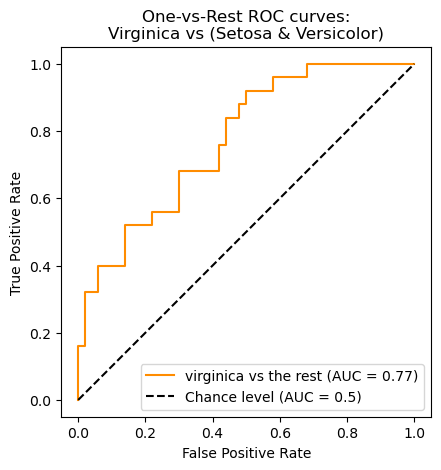

In [71]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

In [ ]:
#

In [72]:
print(f"y_score:\n{y_score[0:2,:]}")
print()
print(f"y_score.ravel():\n{y_score[0:2,:].ravel()}")

y_score:
[[0.05364537 0.09232738 0.85402726]
 [0.10209846 0.02953295 0.86836859]]

y_score.ravel():
[0.05364537 0.09232738 0.85402726 0.10209846 0.02953295 0.86836859]


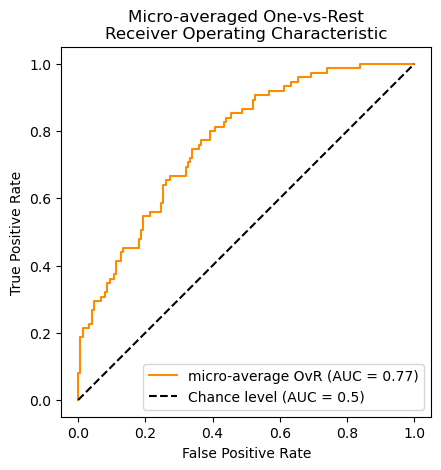

In [73]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.77


In [75]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.77


In [76]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.76


In [77]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.76


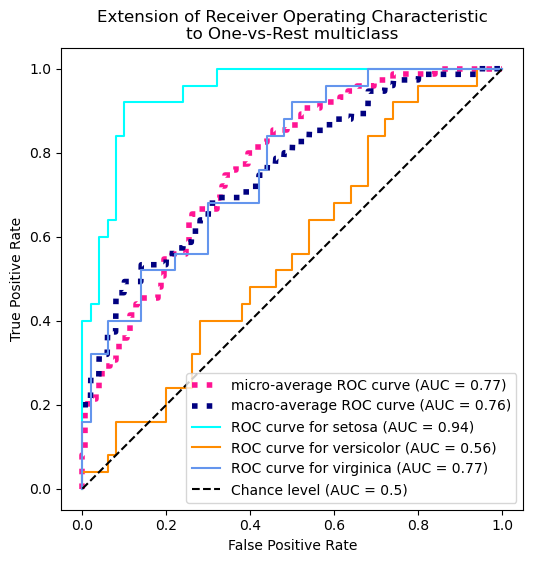

In [78]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

[('setosa', 'versicolor'), ('setosa', 'virginica'), ('versicolor', 'virginica')]


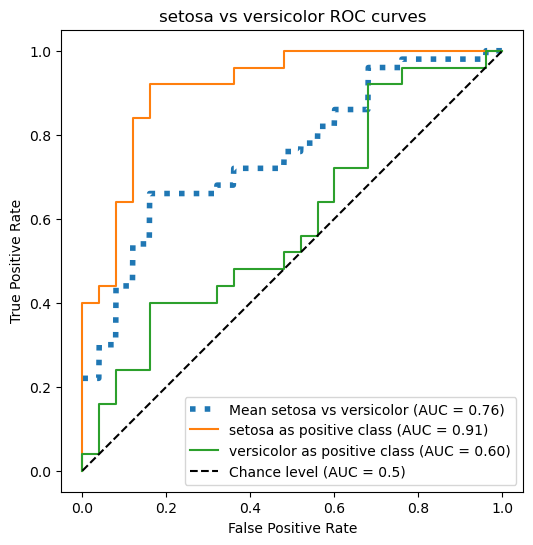

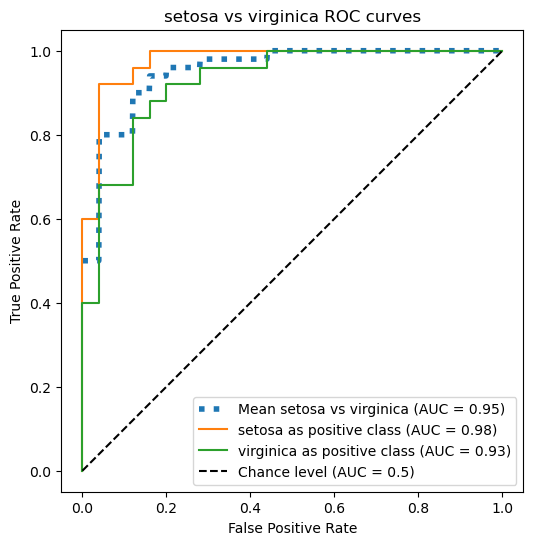

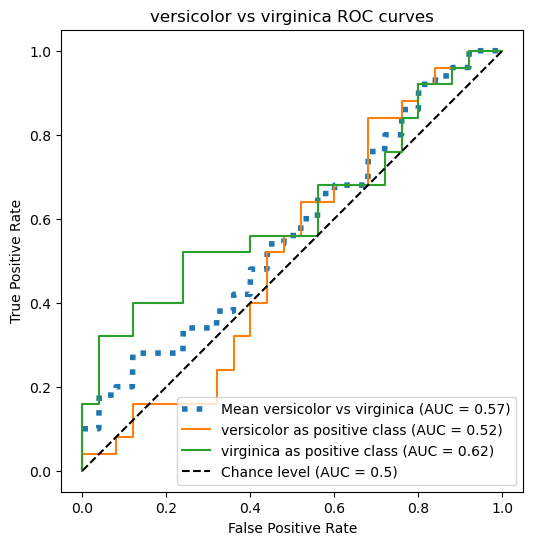

Macro-averaged One-vs-One ROC AUC score:
0.76


In [80]:
from itertools import combinations

pair_list = list(combinations(np.unique(y), 2))
print(pair_list)
pair_scores = []
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = y_test == label_a
    b_mask = y_test == label_b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, y_score[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, y_score[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
        linestyle=":",
        linewidth=4,
    )
    RocCurveDisplay.from_predictions(
        a_true,
        y_score[ab_mask, idx_a],
        ax=ax,
        name=f"{label_a} as positive class",
    )
    RocCurveDisplay.from_predictions(
        b_true,
        y_score[ab_mask, idx_b],
        ax=ax,
        name=f"{label_b} as positive class",
        plot_chance_level=True,
    )
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{target_names[idx_a]} vs {label_b} ROC curves")
    plt.legend()
    plt.show()

print(f"Macro-averaged One-vs-One ROC AUC score:\n{np.average(pair_scores):.2f}")

In [81]:
macro_roc_auc_ovo = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovo",
    average="macro",
)

print(f"Macro-averaged One-vs-One ROC AUC score:\n{macro_roc_auc_ovo:.2f}")

Macro-averaged One-vs-One ROC AUC score:
0.76


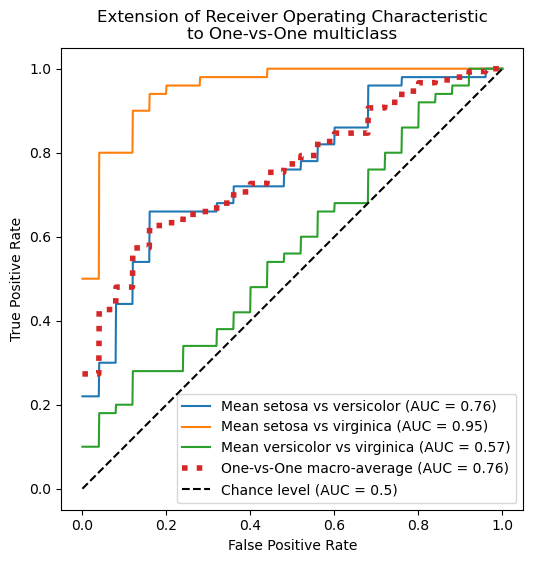

In [82]:
ovo_tpr = np.zeros_like(fpr_grid)

fig, ax = plt.subplots(figsize=(6, 6))
for ix, (label_a, label_b) in enumerate(pair_list):
    ovo_tpr += mean_tpr[ix]
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {pair_scores[ix]:.2f})",
    )

ovo_tpr /= sum(1 for pair in enumerate(pair_list))

plt.plot(
    fpr_grid,
    ovo_tpr,
    label=f"One-vs-One macro-average (AUC = {macro_roc_auc_ovo:.2f})",
    linestyle=":",
    linewidth=4,
)
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-One multiclass")
plt.legend()
plt.show()